In [3]:
!pip install -q efficientnet

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [4]:
import tensorflow as tf
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D,MaxPooling2D, Activation, Flatten, Dropout, Dense
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
os.listdir("/kaggle/input/customized-whole-dataset/bd_plant_diseases_all_classes")

['All Classes']

In [5]:
import os
import gc
import re

import cv2
import math
import numpy as np
import scipy as sp
import pandas as pd

import tensorflow as tf
from IPython.display import SVG
import efficientnet.tfkeras as efn
from keras.utils import plot_model
import tensorflow.keras.layers as L
from keras.utils import model_to_dot
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from kaggle_datasets import KaggleDatasets
from tensorflow.keras.applications import DenseNet121

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

tqdm.pandas()
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

np.random.seed(0)
tf.random.set_seed(0)

import warnings
warnings.filterwarnings("ignore")

In [6]:
EPOCHS = 100
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((75,75))
image_size = 0
directory_root = '/kaggle/input/customized-whole-dataset/bd_plant_diseases_all_classes'
width=75
height=75
depth=3

In [7]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
image_list, label_list, directory_list = [], [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".jpeg") == True:
                    directory_list.append(image_directory)
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
                else:
                    print(image_directory)
    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error --- : {e}")

[INFO] Loading images ...
[INFO] Processing EggPlant_Insect_Pest_Disease ...
[INFO] Processing Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing EggPlant_Wilt_Disease ...
[INFO] Processing Corn_healthy ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Potato_Late_blight ...
[INFO] Processing Wheat_Yellow_Rust ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Corn_Northern_Leaf_Blight ...
[INFO] Processing Potato_healthy ...
[INFO] Processing EggPlant_Leaf_Spot_Disease ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Wheat_Brown_Rust ...
[INFO] Processing Cauliflower_Bacterial_spot_rot ...
[INFO] Processing Cauliflower_Healthy ...
[INFO] Processing Rice_Brown_spot ...
[INFO] Processing Cauliflower_Black_Rot ...
[INFO] Processing Wheat_Healthy ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Cauliflower_Downy_Mildew ...
[INFO] Processing Tomato_Target_Spot ...
[INFO] Processing Rice_Leaf

In [8]:
for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")

            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

[INFO] Processing EggPlant_Insect_Pest_Disease ...
[INFO] Processing Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing EggPlant_Wilt_Disease ...
[INFO] Processing Corn_healthy ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Potato_Late_blight ...
[INFO] Processing Wheat_Yellow_Rust ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Corn_Northern_Leaf_Blight ...
[INFO] Processing Potato_healthy ...
[INFO] Processing EggPlant_Leaf_Spot_Disease ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Wheat_Brown_Rust ...
[INFO] Processing Cauliflower_Bacterial_spot_rot ...
[INFO] Processing Cauliflower_Healthy ...
[INFO] Processing Rice_Brown_spot ...
[INFO] Processing Cauliflower_Black_Rot ...
[INFO] Processing Wheat_Healthy ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Cauliflower_Downy_Mildew ...
[INFO] Processing Tomato_Target_Spot ...
[INFO] Processing Rice_Leaf_smut ...
[INFO] Processin

In [9]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)
print(label_binarizer.classes_)

['Cauliflower_Bacterial_spot_rot' 'Cauliflower_Black_Rot'
 'Cauliflower_Downy_Mildew' 'Cauliflower_Healthy'
 'Corn_Cercospora_leaf_spot_(Gray_leaf_spot)' 'Corn_Common_rust'
 'Corn_Northern_Leaf_Blight' 'Corn_healthy' 'EggPlant_Healthy_Leaf'
 'EggPlant_Insect_Pest_Disease' 'EggPlant_Leaf_Spot_Disease'
 'EggPlant_Mosaic_Virus_Disease' 'EggPlant_Small_Leaf_Disease'
 'EggPlant_White_Mold_Disease' 'EggPlant_Wilt_Disease'
 'Potato_Early_blight' 'Potato_Late_blight' 'Potato_healthy'
 'Rice_Bacterial_leaf_blight' 'Rice_Brown_spot' 'Rice_Healthy'
 'Rice_Leaf_smut' 'Tomato_Bacterial_spot' 'Tomato_Early_blight'
 'Tomato_Late_blight' 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites Two-spotted_spider_mite' 'Tomato_Target_Spot'
 'Tomato_Yellow_Leaf_Curl_Virus' 'Tomato_healthy' 'Tomato_mosaic_virus'
 'Wheat_Brown_Rust' 'Wheat_Healthy' 'Wheat_Yellow_Rust']


In [10]:
np_image_list = np.array(image_list, dtype=np.float16) / 255.0
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.15, random_state = 42)

[INFO] Spliting data to train, test


In [11]:
x_train.shape,x_test.shape

((25991, 75, 75, 3), (4587, 75, 75, 3))

In [12]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest")

In [13]:
import tensorflow as tf
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                     min_delta=0.0001,
                                     patience=10,
                                     mode="auto",
                                     verbose = 1)
]

In [14]:
len(image_list)

30578

# **Our Model**

In [15]:
def Res_Plot_Test_Save(name):
    print("[INFO] Calculating model accuracy")
    scores = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {scores[1]*100}")
    print("[INFO] Saving model")
    model.save(name)

In [16]:
def display_training_curves(training, validation, yaxis):
    ylabel = "{}".format(yaxis)
    title = "{} vs. Epochs".format(yaxis)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=training, marker=dict(color="dodgerblue"),
               name="Train"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=validation, marker=dict(color="darkorange"),
               name="Val"))

    fig.update_layout(title_text=title, yaxis_title=ylabel, xaxis_title="Epochs", template="plotly_white")
    fig.show()

In [17]:
def recall_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32') 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32') 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32') 
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [18]:
# def create_model():
model = tf.keras.backend.clear_session()
model = None
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
# model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution

# model.compile(loss="binary_crossentropy", optimizer=opt, metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Accuracy()])
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy', f1_m,  precision_m, recall_m])


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 75, 75, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,039,011 (19.22 MB)

 Trainable params: 5,036,131 (19.21 MB)

 Non-trainable params: 2,880 (11.25 KB)

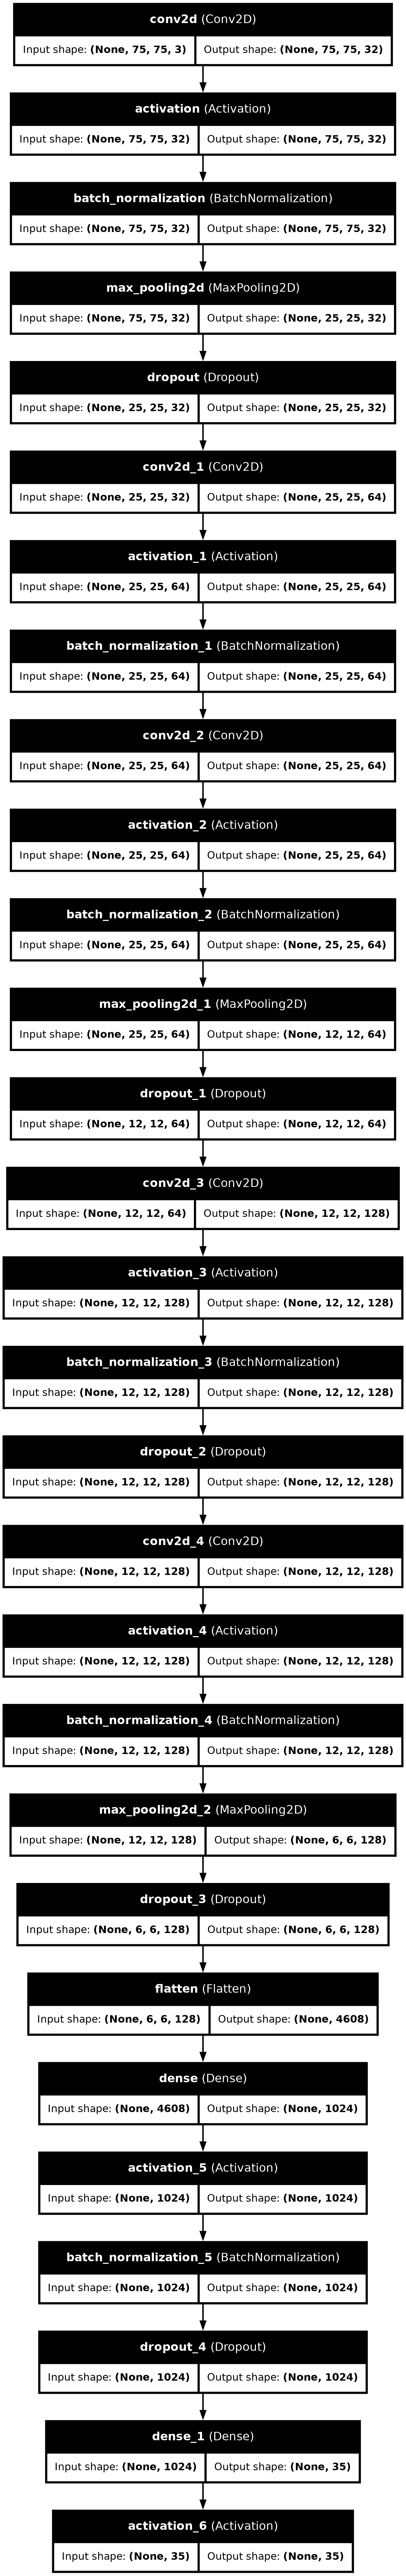

In [20]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
# # def create_model():
# model = tf.keras.backend.clear_session()
# model = None
# model = Sequential()
# inputShape = (height, width, depth)
# chanDim = -1
# if K.image_data_format() == "channels_first":
#     inputShape = (depth, height, width)
#     chanDim = 1
# model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(3, 3)))
# # model.add(Dropout(0.25))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Dropout(0.35))
# model.add(Conv2D(64, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))
# model.add(Dropout(0.65))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(Dropout(0.65))
# model.add(Conv2D(128, (3, 3), padding="same"))
# model.add(Activation("relu"))
# model.add(BatchNormalization(axis=chanDim))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))
# model.add(Dropout(0.6))
# model.add(Flatten())
# model.add(Dropout(0.3))
# model.add(Dense(1024))
# model.add(Activation("relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(n_classes))
# model.add(Activation("softmax"))
# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# # distribution

# # model.compile(loss="binary_crossentropy", optimizer=opt, metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Accuracy()])
# model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy', f1_m,  precision_m, recall_m])


In [20]:
# train the network
print("[INFO] training network...")
history = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=100
    )

[INFO] training network...
Epoch 1/100


I0000 00:00:1728216050.316539     109 service.cc:145] XLA service 0x7ad808002060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728216050.316605     109 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728216050.316610     109 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  4/812 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.0566 - f1_m: 0.0415 - loss: 1.0300 - precision_m: 0.2347 - recall_m: 0.0228 

I0000 00:00:1728216061.189494     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


812/812 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.4063 - f1_m: 0.3293 - loss: 0.2869 - precision_m: 0.6194 - recall_m: 0.2554 - val_accuracy: 0.3080 - val_f1_m: 0.3060 - val_loss: 0.4395 - val_precision_m: 0.3188 - val_recall_m: 0.2945
Epoch 2/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.5938 - f1_m: 0.5455 - loss: 0.0631 - precision_m: 0.6522 - recall_m: 0.4688 - val_accuracy: 0.3203 - val_f1_m: 0.3185 - val_loss: 0.4254 - val_precision_m: 0.3320 - val_recall_m: 0.3064
Epoch 3/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 53s 65ms/step - accuracy: 0.7326 - f1_m: 0.7348 - loss: 0.0438 - precision_m: 0.8118 - recall_m: 0.6734 - val_accuracy: 0.4899 - val_f1_m: 0.4907 - val_loss: 0.2809 - val_precision_m: 0.5338 - val_recall_m: 0.4555
Epoch 4/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.9062 - f1_m: 0.8667 - loss: 0.0289 - precision_m: 0.9286 - recall_m: 0.8125 - val_accuracy: 0.4846 - val_f1_m: 0.4854 - val_loss: 0.2517 - val_precision_m: 0.5233 - val_recall_m:

In [21]:
def precision_m(y_true, y_pred):
    y_true = K.cast(y_true, 'float32') 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [31]:
import os
import torch

# Replace 'your_model' with your actual model
torch.save(model, "model.pth")
model_size = os.path.getsize("model.pth") / (1024 * 1024)  # Size in MB
print(f"Model Size: {model_size:.2f} MB")


Model Size: 142.81 MB


In [23]:
# # pip install matplotlib scikit-learn

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Assuming you have your true labels and predicted labels
# # true_labels = ...
# # predicted_labels = ...

# # Example: true_labels and predicted_labels after model evaluation
# true_labels = y_test  # Replace with actual true labels
# predicted_labels = model.predict(x_test) # Replace with actual predictions

# # Compute confusion matrix
# cm = confusion_matrix(true_labels, predicted_labels)

# # Create a confusion matrix display
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# # Plotting
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()

# ###############################################
# # Assuming your TensorFlow model is already defined and compiled
# model.evaluate(test_dataset)  # Replace with your test dataset

# # Get predictions
# y_true = []
# y_pred = []

# for images, labels in test_dataset:  # Replace with your test dataset
#     predictions = model(images, training=False)
#     y_true.extend(labels.numpy())  # Collect true labels
#     y_pred.extend(tf.argmax(predictions, axis=1).numpy())  # Collect predicted class indices

# # Convert to numpy arrays
# y_true = np.array(y_true)
# y_pred = np.array(y_pred)

# # Compute confusion matrix
# cm = tf.math.confusion_matrix(y_true, y_pred)

# # Convert to numpy for visualization
# cm = cm.numpy()

# # Create and plot confusion matrix display
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# # Assuming you have your true labels and predicted labels
# true_labels = y_test  # Replace with actual true labels
# predicted_probabilities = model.predict(x_test)  # Get probabilities from the model

# # Convert softmax probabilities to class indices
# predicted_labels = np.argmax(predicted_probabilities, axis=1)

# # Compute confusion matrix
# cm = confusion_matrix(true_labels, predicted_labels)

# # Create a confusion matrix display
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# # Plotting
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()


In [31]:
# print(len(history.history['accuracy']))  # Should be 150
# def display_training_curves(training, validation, yaxis):
#     ylabel = "{}".format(yaxis)
#     title = "{} vs. Epochs".format(yaxis)

#     fig = go.Figure()

#     # Use the length of training data to determine x-axis
#     epochs = len(training)

#     fig.add_trace(
#         go.Scatter(x=np.arange(1, epochs + 1), mode='lines+markers', y=training,
#                    marker=dict(color="dodgerblue"), name="Train")
#     )

#     fig.add_trace(
#         go.Scatter(x=np.arange(1, epochs + 1), mode='lines+markers', y=validation,
#                    marker=dict(color="darkorange"), name="Val")
#     )

#     fig.update_layout(title_text=title, yaxis_title=ylabel, xaxis_title="Epochs", template="plotly_white")
#     fig.show()
# display_training_curves(
#     history.history['accuracy'],
#     history.history['val_accuracy'],
#     'accuracy')

150


In [21]:
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'accuracy')
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss')
display_training_curves(
    history.history['precision_m'],
    history.history['val_precision_m'],
    'precision')
display_training_curves(
    history.history['recall_m'],
    history.history['val_recall_m'],
    'recall')
display_training_curves(
    history.history['f1_m'],
    history.history['val_f1_m'],
    'f1 score')

NameError: name 'history' is not defined

In [24]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))

Accuracy: 0.9583606123924255 
Loss:0.01181128341704607 
F1_score: 0.9585147500038147 
Precision: 0.9598091840744019 
Recall: 0.9572679996490479


## Predicting on a single image

/kaggle/input/customized-whole-dataset/bd_plant_diseases_all_classes/All Classes/EggPlant_Mosaic_Virus_Disease/Mosaic-Virus-1-_jpg.rf.bd82b6c570b31d283ca4af86975961e1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


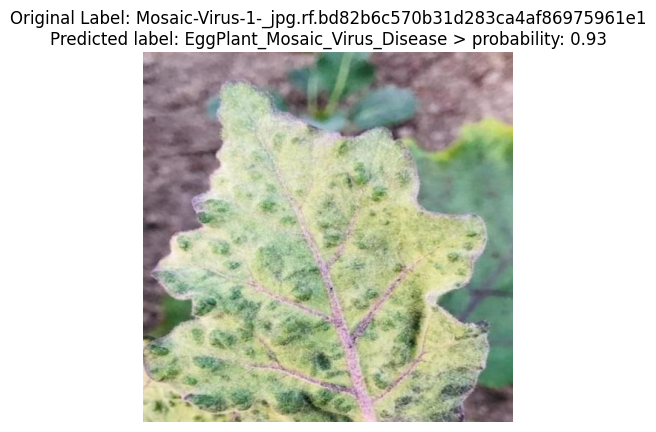

In [27]:
from random import randint

image_dir= "/kaggle/input/customized-whole-dataset/bd_plant_diseases_all_classes/All Classes/EggPlant_Mosaic_Virus_Disease/Mosaic-Virus-1-_jpg.rf.bd82b6c570b31d283ca4af86975961e1.jpg"
print(image_dir)
index1 = image_dir.rfind('/')
index2 = image_dir.rfind('.')
Image1 = plt.imread(image_dir)

im=convert_image_to_array(image_dir)
np_image_li = np.array(im, dtype=np.float16) / 225.0
npp_image = np.expand_dims(np_image_li, axis=0)
result=model.predict(npp_image)
itemindex = np.where(result==np.max(result))
# print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Original Label: "+image_dir[index1+1:index2]+"\n"+"Predicted label: "+label_binarizer.classes_[itemindex[1][0]]+" > probability: "+str(np.max(result))[:4])
plt.show()

## Predicting on four random images

In [ ]:
# # create figure
# fig = plt.figure(figsize=(16, 10))

# # setting values to rows and column variables
# rows = 2
# columns = 2

# # Adds a subplot at the 1st position
# fig.add_subplot(rows, columns, 1)

# # showing image
# image_dir=directory_list[randint(0,len(directory_list))]
# index1 = image_dir.rfind('/')
# index2 = image_dir.rfind('.')
# Image1 = plt.imread(image_dir)
# im=convert_image_to_array(image_dir)
# np_image_li = np.array(im, dtype=np.float16) / 225.0
# npp_image = np.expand_dims(np_image_li, axis=0)
# result=model.predict(npp_image)
# itemindex = np.where(result==np.max(result))
# plt.imshow(Image1)
# plt.axis('off')
# plt.title("Original Label: "+image_dir[index1+1:index2]+"\n"+"Predicted label: "+label_binarizer.classes_[itemindex[1][0]]+" > probability: "+str(np.max(result))[:4])

# # Adds a subplot at the 2nd position
# fig.add_subplot(rows, columns, 2)

# # showing image
# image_dir=directory_list[randint(0,len(directory_list))]
# index1 = image_dir.rfind('/')
# index2 = image_dir.rfind('.')
# Image2 = plt.imread(image_dir)
# im=convert_image_to_array(image_dir)
# np_image_li = np.array(im, dtype=np.float16) / 225.0
# npp_image = np.expand_dims(np_image_li, axis=0)
# result=model.predict(npp_image)
# itemindex = np.where(result==np.max(result))
# plt.imshow(Image2)
# plt.axis('off')
# plt.title("Original Label: "+image_dir[index1+1:index2]+"\n"+"Predicted label: "+label_binarizer.classes_[itemindex[1][0]]+" > probability: "+str(np.max(result))[:4])

# # Adds a subplot at the 3rd position
# fig.add_subplot(rows, columns, 3)

# # showing image
# image_dir=directory_list[randint(0,len(directory_list))]
# index1 = image_dir.rfind('/')
# index2 = image_dir.rfind('.')
# Image3 = plt.imread(image_dir)
# im=convert_image_to_array(image_dir)
# np_image_li = np.array(im, dtype=np.float16) / 225.0
# npp_image = np.expand_dims(np_image_li, axis=0)
# result=model.predict(npp_image)
# itemindex = np.where(result==np.max(result))
# plt.imshow(Image3)
# plt.axis('off')
# plt.title("Original Label: "+image_dir[index1+1:index2]+"\n"+"Predicted label: "+label_binarizer.classes_[itemindex[1][0]]+" > probability: "+str(np.max(result))[:4])

# # Adds a subplot at the 4th position
# fig.add_subplot(rows, columns, 4)

# # showing image
# image_dir=directory_list[randint(0,len(directory_list))]
# index1 = image_dir.rfind('/')
# index2 = image_dir.rfind('.')
# Image4 = plt.imread(image_dir)
# im=convert_image_to_array(image_dir)
# np_image_li = np.array(im, dtype=np.float16) / 225.0
# npp_image = np.expand_dims(np_image_li, axis=0)
# result=model.predict(npp_image)
# itemindex = np.where(result==np.max(result))
# plt.imshow(Image4)
# plt.axis('off')
# plt.title("Original Label: "+image_dir[index1+1:index2]+"\n"+"Predicted label: "+label_binarizer.classes_[itemindex[1][0]]+" > probability: "+str(np.max(result))[:4])
# plt.show()

In [ ]:
# Res_Plot_Test_Save('penta_CNN_Algorithm.h5')

# **Inception**

In [19]:
model = tf.keras.backend.clear_session()

In [28]:
# from keras.models import Model
# from keras.optimizers import Adam
# from keras.layers import GlobalAveragePooling2D
# from keras.layers import Dense
# from keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.utils import to_categorical
# # model = tf.keras.backend.clear_session()


# # Get the InceptionV3 model so we can do transfer learning
# base_inception = InceptionV3(weights='imagenet', include_top=False,
#                              input_shape=inputShape)
# n_classes= 35
# # Add a global spatial average pooling layer
# out = base_inception.output
# out = GlobalAveragePooling2D()(out)
# out = Dense(512, activation='relu')(out)
# out = Dense(512, activation='relu')(out)
# predictions = Dense(n_classes, activation='softmax')(out)
# model = Model(inputs=base_inception.input, outputs=predictions)

# # only if we want to freeze layers
# for layer in base_inception.layers:
#     layer.trainable = False

# # Compile

# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m])
# # model.summary()

In [29]:
# # train the network
# print("[INFO] training INCEPTION network...")
# history = model.fit(
#     aug.flow(x_train, y_train, batch_size=BS),
#     validation_data=(x_test, y_test),
#     steps_per_epoch=len(x_train) // BS,
#     epochs=250
#     )

[INFO] training INCEPTION network...
Epoch 1/250
812/812 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.5052 - f1_m: 0.4725 - loss: 0.0847 - precision_m: 0.6877 - recall_m: 0.3786 - val_accuracy: 0.6497 - val_f1_m: 0.6530 - val_loss: 0.0480 - val_precision_m: 0.7458 - val_recall_m: 0.5835
Epoch 2/250
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5000 - f1_m: 0.5091 - loss: 0.0524 - precision_m: 0.6087 - recall_m: 0.4375 - val_accuracy: 0.6503 - val_f1_m: 0.6517 - val_loss: 0.0478 - val_precision_m: 0.7478 - val_recall_m: 0.5802
Epoch 3/250
812/812 ━━━━━━━━━━━━━━━━━━━━ 53s 65ms/step - accuracy: 0.6720 - f1_m: 0.6720 - loss: 0.0457 - precision_m: 0.7686 - recall_m: 0.5993 - val_accuracy: 0.7066 - val_f1_m: 0.7059 - val_loss: 0.0417 - val_precision_m: 0.7799 - val_recall_m: 0.6466
Epoch 4/250
812/812 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6250 - f1_m: 0.6429 - loss: 0.0478 - precision_m: 0.7500 - recall_m: 0.5625 - val_accuracy: 0.7048 - val_f1_m: 0.7021 - val_loss: 0.0

In [22]:
############MOBILENETV2####################################
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.utils import to_categorical

# # Clear previous sessions
# tf.keras.backend.clear_session()

# # Define input shape and number of classes
# input_shape = (75, 75, 3)  # Adjust according to your image size
# n_classes = 35  # Set the number of classes

# # Get the MobileNetV2 model for transfer learning
# base_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# # Add a global spatial average pooling layer
# out = base_mobilenet.output
# out = GlobalAveragePooling2D()(out)
# out = Dense(512, activation='relu')(out)
# out = Dense(512, activation='relu')(out)
# predictions = Dense(n_classes, activation='softmax')(out)

# # Create the complete model
# model = Model(inputs=base_mobilenet.input, outputs=predictions)

# # Optionally freeze the base layers
# for layer in base_mobilenet.layers:
#     layer.trainable = False

# # Define learning rate and number of epochs
# INIT_LR = 1e-4  # Adjust as necessary
# EPOCHS = 20  # Set the number of epochs

# # Compile the model
# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m])

############################DENSENET121###################################
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from tensorflow.keras.applications import DenseNet121
# # from keras_shufflenet_v2 import ShuffleNetV2
# from tensorflow.keras.utils import to_categorical

# # Clear previous sessions
# tf.keras.backend.clear_session()

# # Define input shape and number of classes
# input_shape = (75, 75, 3)  # Adjust according to your image size
# n_classes = 35  # Set the number of classes

# # Get the ShuffleNetV2 model for transfer learning
# base_shufflenet = DenseNet121(input_shape=input_shape, include_top=False, weights='imagenet')

# # Add a global spatial average pooling layer
# out = base_shufflenet.output
# out = GlobalAveragePooling2D()(out)
# out = Dense(512, activation='relu')(out)
# out = Dense(512, activation='relu')(out)
# predictions = Dense(n_classes, activation='softmax')(out)

# # Create the complete model
# model = Model(inputs=base_shufflenet.input, outputs=predictions)

# # Optionally freeze the base layers
# for layer in base_shufflenet.layers:
#     layer.trainable = False

# # Define learning rate and number of epochs
# INIT_LR = 1e-4  # Adjust as necessary
# EPOCHS = 20  # Set the number of epochs

# # Compile the model
# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m])

################XCEPTION##############
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import Xception
from tensorflow.keras.utils import to_categorical

# Clear previous sessions
tf.keras.backend.clear_session()

# Define input shape and number of classes
input_shape = (75, 75, 3)
n_classes = 35

# Get the Xception model for transfer learning
base_xception = Xception(input_shape=input_shape, include_top=False, weights='imagenet')

# Add a global spatial average pooling layer
out = base_xception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)

# Create the complete model
model = Model(inputs=base_xception.input, outputs=predictions)

# Optionally freeze the base layers
for layer in base_xception.layers:
    layer.trainable = False

# Define learning rate and number of epochs
INIT_LR = 1e-4
EPOCHS = 20

# Compile the model
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy', f1_m,  precision_m, recall_m])

# Display the model summary
# model.summary()


In [23]:
# train the network
print("[INFO] training EfficientNetB0 network...")
history = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=100
    )

[INFO] training EfficientNetB0 network...
Epoch 1/100


I0000 00:00:1731255241.836324    1038 service.cc:145] XLA service 0x7c5fd0004fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731255241.836370    1038 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731255241.836374    1038 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  4/812 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.0169 - f1_m: 0.0000e+00 - loss: 3.6411 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00     

I0000 00:00:1731255246.154644    1038 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


812/812 ━━━━━━━━━━━━━━━━━━━━ 72s 77ms/step - accuracy: 0.5113 - f1_m: 0.3781 - loss: 1.8299 - precision_m: 0.7447 - recall_m: 0.2755 - val_accuracy: 0.7172 - val_f1_m: 0.6579 - val_loss: 0.9940 - val_precision_m: 0.8680 - val_recall_m: 0.5338
Epoch 2/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6250 - f1_m: 0.5600 - loss: 0.9897 - precision_m: 0.7778 - recall_m: 0.4375 - val_accuracy: 0.7157 - val_f1_m: 0.6612 - val_loss: 0.9944 - val_precision_m: 0.8703 - val_recall_m: 0.5370
Epoch 3/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 66s 66ms/step - accuracy: 0.7247 - f1_m: 0.6892 - loss: 0.9109 - precision_m: 0.8446 - recall_m: 0.5857 - val_accuracy: 0.7384 - val_f1_m: 0.7124 - val_loss: 0.8475 - val_precision_m: 0.8549 - val_recall_m: 0.6136
Epoch 4/100
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6250 - f1_m: 0.6909 - loss: 1.2793 - precision_m: 0.8261 - recall_m: 0.5938 - val_accuracy: 0.7401 - val_f1_m: 0.7154 - val_loss: 0.8438 - val_precision_m: 0.8612 - val_recall_m: 0.6

In [ ]:
def display_training_curves(training, validation, yaxis):
    ylabel = "{}".format(yaxis)
    title = "{} vs. Epochs".format(yaxis)

    fig = go.Figure()

    # Use the length of training data to determine x-axis
    epochs = len(training)

    fig.add_trace(
        go.Scatter(x=np.arange(1, epochs + 1), mode='lines+markers', y=training,
                   marker=dict(color="dodgerblue"), name="Train")
    )

    fig.add_trace(
        go.Scatter(x=np.arange(1, epochs + 1), mode='lines+markers', y=validation,
                   marker=dict(color="darkorange"), name="Val")
    )

    fig.update_layout(title_text=title, yaxis_title=ylabel, xaxis_title="Epochs", template="plotly_white")
    fig.show()
# display_training_curves(
#     history.history['accuracy'],
#     history.history['val_accuracy'],
#     'accuracy')

In [49]:
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'accuracy')
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss')
display_training_curves(
    history.history['precision_m'],
    history.history['val_precision_m'],
    'precision')
display_training_curves(
    history.history['recall_m'],
    history.history['val_recall_m'],
    'recall')
display_training_curves(
    history.history['f1_m'],
    history.history['val_f1_m'],
    'f1 score')

In [32]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))

Accuracy: 0.8473948240280151 
Loss:0.02382316254079342 
F1_score: 0.8467915058135986 
Precision: 0.8565316200256348 
Recall: 0.8375157713890076


In [39]:
Res_Plot_Test_Save('MobilenetV2.h5')

[INFO] Calculating model accuracy
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8406 - f1_m: 0.8411 - loss: 0.0249 - precision_m: 0.8502 - recall_m: 0.8324
Test Accuracy: 84.73948240280151
[INFO] Saving model


In [43]:
model_size = os.path.getsize('MobilenetV2.h5')  # Size in bytes
model_size_mb = model_size / (1024 * 1024)  # Convert to MB
model_size_mb

19.83702850341797

In [35]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 38, 38,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 38, 38,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 38, 38,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 38, 38,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 38, 38,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 38, 38,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 38, 38,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 38, 38,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 38, 38,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 38, 38,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 38, 38,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 39, 39,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 19, 19,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 19, 19,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 19, 19,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 19, 19,    │      2,304 │ block_1_depthwis

 Total params: 5,067,435 (19.33 MB)

 Trainable params: 936,483 (3.57 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 1,872,968 (7.14 MB)

# **Resnet Model**

In [52]:
from keras.models import Model
from keras import applications
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import to_categorical
model = tf.keras.backend.clear_session()

# Get the Resnet model so we can do transfer learning
base_model = applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (75,75,3))

# Add a global spatial average pooling layer
out = base_model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
predictions = Dense(n_classes, activation='softmax')(out)
model = Model(inputs=base_model.input, outputs=predictions)

# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False

# Compile
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m])
# model.summary()

NameError: name 'base_inception' is not defined

In [35]:
# train the network
print("[INFO] training RESNET network...")
history = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=250
    )

[INFO] training RESNET network...
Epoch 1/250
812/812 ━━━━━━━━━━━━━━━━━━━━ 135s 103ms/step - accuracy: 0.4336 - f1_m: 0.3996 - loss: 0.0955 - precision_m: 0.6016 - recall_m: 0.3214 - val_accuracy: 0.5032 - val_f1_m: 0.5136 - val_loss: 0.0861 - val_precision_m: 0.5643 - val_recall_m: 0.4726
Epoch 2/250
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6562 - f1_m: 0.6897 - loss: 0.0433 - precision_m: 0.7692 - recall_m: 0.6250 - val_accuracy: 0.5051 - val_f1_m: 0.5103 - val_loss: 0.0873 - val_precision_m: 0.5556 - val_recall_m: 0.4730
Epoch 3/250
812/812 ━━━━━━━━━━━━━━━━━━━━ 57s 70ms/step - accuracy: 0.7101 - f1_m: 0.7134 - loss: 0.0421 - precision_m: 0.7882 - recall_m: 0.6538 - val_accuracy: 0.6067 - val_f1_m: 0.6152 - val_loss: 0.0586 - val_precision_m: 0.6703 - val_recall_m: 0.5698
Epoch 4/250
812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6562 - f1_m: 0.7119 - loss: 0.0458 - precision_m: 0.7778 - recall_m: 0.6562 - val_accuracy: 0.5869 - val_f1_m: 0.5941 - val_loss: 0.06

In [36]:
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'accuracy')
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss')
display_training_curves(
    history.history['precision_m'],
    history.history['val_precision_m'],
    'precision')
display_training_curves(
    history.history['recall_m'],
    history.history['val_recall_m'],
    'recall')
display_training_curves(
    history.history['f1_m'],
    history.history['val_f1_m'],
    'f1 score')

In [37]:
# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))

Accuracy: 0.9409199953079224 
Loss:0.014730083756148815 
F1_score: 0.9410113096237183 
Precision: 0.9425862431526184 
Recall: 0.9394925236701965


In [38]:
Res_Plot_Test_Save('ResNet_(Imagenet_Weights).h5')

[INFO] Calculating model accuracy
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9366 - f1_m: 0.9373 - loss: 0.0165 - precision_m: 0.9394 - recall_m: 0.9351
Test Accuracy: 94.09199953079224
[INFO] Saving model


# **VGG16 Model**

In [39]:
# tf.keras.backend.clear_session()
# model = None
# model

In [40]:
# from keras.models import Model
# from keras.applications import vgg19
# from keras.optimizers import Adam
# from keras.layers import GlobalAveragePooling2D
# from keras.layers import Dense
# from keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.utils import to_categorical
# model = tf.keras.backend.clear_session()
# # Get the Resnet model so we can do transfer learning
# base_model = vgg19.VGG19(weights= None, include_top=False, input_shape= (75,75,3))
# # model= None
# # Add a global spatial average pooling layer
# out = base_model.output
# out = GlobalAveragePooling2D()(out)
# out = Dense(512, activation='relu')(out)
# out = Dense(512, activation='relu')(out)
# predictions = Dense(n_classes, activation='softmax')(out)
# model = Model(inputs=base_model.input, outputs=predictions)

# # only if we want to freeze layers
# for layer in base_inception.layers:
#     layer.trainable = False

# # Compile
# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m])
# model.summary()

In [41]:
# # train the network
# print("[INFO] training VGG19 network...")
# history = model.fit(
#     aug.flow(x_train, y_train, batch_size=BS),
#     validation_data=(x_test, y_test),
#     steps_per_epoch=len(x_train) // BS,
#     epochs=100
#     )

In [42]:
# display_training_curves(
#     history.history['accuracy'],
#     history.history['val_accuracy'],
#     'accuracy')
# display_training_curves(
#     history.history['loss'],
#     history.history['val_loss'],
#     'loss')
# display_training_curves(
#     history.history['precision_m'],
#     history.history['val_precision_m'],
#     'precision')
# display_training_curves(
#     history.history['recall_m'],
#     history.history['val_recall_m'],
#     'recall')
# display_training_curves(
#     history.history['f1_m'],
#     history.history['val_f1_m'],
#     'f1 score')

In [43]:
# # evaluate the model
# loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
# print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))

In [44]:
# Res_Plot_Test_Save('VGG16_(Imagenet_Weights).h5')

In [45]:
# from keras.models import Model
# from keras.applications import vgg19
# from keras.optimizers import Adam
# from keras.layers import GlobalAveragePooling2D
# from keras.layers import Dense
# from keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.utils import to_categorical
# model = tf.keras.backend.clear_session()
# # Get the Resnet model so we can do transfer learning


# base_model = vgg19.VGG19(weights= None, include_top=False, input_shape= (75,75,3))
# # model= None
# # Add a global spatial average pooling layer
# out = base_model.output
# out = GlobalAveragePooling2D()(base_model)
# out = Dense(512, activation='relu')(out)
# out = Dense(512, activation='relu')(out)
# predictions = Dense(n_classes, activation='softmax')(out)
# model = Model(inputs=base_model.input, outputs=predictions)

# # only if we want to freeze layers
# for layer in base_inception.layers:
#     layer.trainable = False

# # Compile
# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m])
# model.summary()

In [46]:
!pip install tensorflow tensorflow-hub

In [47]:
# import tensorflow as tf
# import tensorflow_hub as hub
# from keras.models import Model
# from keras.layers import Dense
# from keras.optimizers import Adam
# from tensorflow.keras.utils import to_categorical

# # Define constants
# INPUT_SHAPE = (75, 75, 3)  # Image shape expected by the model
# N_CLASSES = 10  # Number of output classes
# INIT_LR = 1e-3  # Initial learning rate
# EPOCHS = 50  # Number of epochs

# # Load Vision Transformer model from TensorFlow Hub
# model_url = "https://tfhub.dev/google/imagenet/vit_base_patch16_224/feature_vector/5"
# hub_model = hub.KerasLayer(model_url, input_shape=INPUT_SHAPE, trainable=False)

# # Define the Keras model using the hub layer
# inputs = tf.keras.Input(shape=INPUT_SHAPE)
# x = hub_model(inputs)
# x = Dense(512, activation='relu')(x)
# x = Dense(512, activation='relu')(x)
# predictions = Dense(N_CLASSES, activation='softmax')(x)

# model = Model(inputs=inputs, outputs=predictions)

# # Compile the model
# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

# model.summary()

# # Assuming x_train, y_train, x_test, y_test are your data arrays
# # Convert target data to categorical format
# y_train = to_categorical(y_train, num_classes=N_CLASSES)
# y_test = to_categorical(y_test, num_classes=N_CLASSES)

# # Train the Keras model with features extracted by Vision Transformer
# history = model.fit(
#     x_train, y_train,
#     validation_data=(x_test, y_test),
#     batch_size=32,
#     epochs=EPOCHS
# )


In [48]:
# # # train the network
# # print("[INFO] training YOLO network...")
# # history = moddisplay_training_curves(
#     history.history['accuracy'],
#     history.history['val_accuracy'],
#     'accuracy')
# display_training_curves(
#     history.history['loss'],
#     history.history['val_loss'],
#     'loss')
# display_training_curves(
#     history.history['precision_m'],
#     history.history['val_precision_m'],
#     'precision')
# display_training_curves(
#     history.history['recall_m'],
#     history.history['val_recall_m'],
#     'recall')
# display_training_curves(
#     history.history['f1_m'],
#     history.history['val_f1_m'],
#     'f1 score')el.fit(
# #     aug.flow(x_train, y_train, batch_size=BS),
# #     validation_data=(x_test, y_test),
# #     steps_per_epoch=len(x_train) // BS,
# #     epochs=100
# #     )

In [49]:
# # evaluate the model
# loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
# print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))

In [50]:
# from keras.models import Model
# from keras.applications import vgg16
# from keras.optimizers import Adam
# from keras.layers import GlobalAveragePooling2D
# from keras.layers import Dense
# from keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.utils import to_categorical
# model = tf.keras.backend.clear_session()

# from ultralytics import YOLOv10

# # Get the Resnet model so we can do transfer learning
# # base_model = vgg16.VGG16(weights= None, include_top=False, input_shape= (75,75,3))
# base_model = YOLOv10(tiny=False, input_size=(75, 75, 3))
# # yolo.load_weights("yolov10.weights", weights_type="yolo")
# # base_model= yolo.model
# # model= None
# # Add a global spatial average pooling layer
# out = base_model.output
# out = GlobalAveragePooling2D()(out)
# out = Dense(512, activation='relu')(out)
# out = Dense(512, activation='relu')(out)
# predictions = Dense(n_classes, activation='softmax')(out)
# model = Model(inputs=base_model.input, outputs=predictions)

# # only if we want to freeze layers
# for layer in base_inception.layers:
#     layer.trainable = False

# # Compile
# opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy', f1_m,  precision_m, recall_m])
# model.summary()

In [51]:
# print("[INFO] training YOLOv10 network...")
# history = model.fit(
#     aug.flow(x_train, y_train, batch_size=BS),
#     validation_data=(x_test, y_test),
#     steps_per_epoch=len(x_train) // BS,
#     epochs=100
#     )

In [52]:
# display_training_curves(
#     history.history['accuracy'],
#     history.history['val_accuracy'],
#     'accuracy')
# display_training_curves(
#     history.history['loss'],
#     history.history['val_loss'],
#     'loss')
# display_training_curves(
#     history.history['precision_m'],
#     history.history['val_precision_m'],
#     'precision')
# display_training_curves(
#     history.history['recall_m'],
#     history.history['val_recall_m'],
#     'recall')
# display_training_curves(
#     history.history['f1_m'],
#     history.history['val_f1_m'],
#     'f1 score')

In [53]:
# loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
# print("Accuracy: {} \nLoss:{} \nF1_score: {} \nPrecision: {} \nRecall: {}".format(accuracy, loss, f1_score, precision, recall))